In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from fastai.text.all import *

In [2]:
df = pd.read_csv('data/filtered_data.csv', usecols=[1, 4])
df.head()

,Category,Normalized_Resume
0,Data Science,Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM Nave Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Dee...
1,Data Science,Education Details May to May BE UITRGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60A Koramangala 5th block AchievementsTasks behind sukh sagar Bengaluru India Developed and deployed auto prepro...
2,Data Science,Areas of Interest Deep Learning Control System Design Programming inPython Electric Machinery Web Development Analytics Technical Activities q Hindustan Aeronautics Limited Bangalore For 4 weeks under the guidance of Mr Satish Senior Engineer in the hangar of Mirage fighter aircraft Technical Skills Programming Matlab Python and Java LabView Python WebFrameWorkDjango Flask LTSPICEintermediate Languages and and MIPOWERintermediate Github GitBash Jupyter Notebook Xampp MySQLBasics Python Software Packages InterpretersAnaconda Python2 Python3 Pycharm Java IDEEclipse Operating Systems Windows ...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL SAP HANA PAL MS SQL SAP Lumira C Linear Programming Data Modelling Advance Analytics SCM Analytics Retail Analytics Social Media Analytics NLP Education Details January to January PGDM Business Analytics Great Lakes Institute of Management Illinois Institute of Technology January Bachelor of Engineering Electronics and Communication Bengaluru Karnataka New Horizon College of Engineering Bangalore Visvesvaraya Technological University Data Science Consultant Consultant Deloitte USI Skill Details LINEAR PROGRAMMING Exprience 6 months RETAIL Expri...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryana Data Science internship Skill Details Data Structure Exprience Less than 1 year months C Exprience Less than 1 year months Data Analysis Exprience Less than 1 year months Python Exprience Less than 1 year months Core Java Exprience Less than 1 year months Database Management Exprience Less than 1 year monthsCompany Details company Itechpower description


# Split the data
Split dataset into train and vakud **sets**

In [3]:
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)

In [4]:
train_df.shape, valid_df.shape

((769, 2), (193, 2))

# Create DataLoaders

Create dataloaders for train and valid sets

In [5]:
dls = TextDataLoaders.from_df(train_df,
                              valid_df=valid_df,
                              text_col='Normalized_Resume',
                              label_col='Category',
                              is_lm=False,
                              bs=32)
dls.show_batch()

,text,category
0,xxbos xxmaj education xxmaj details xxmaj august xxup be xxmaj electronics xxmaj pune xxmaj maharashtra xxmaj pune xxmaj university xxmaj operations xxmaj manager xxmaj operations xxmaj manager xxmaj delta xxmaj controls xxmaj dubai xxup fzco xxmaj skill xxmaj details xxmaj company xxmaj details company xxmaj delta xxmaj controls xxmaj dubai xxup fzco description xxmaj heading xxmaj pune xxmaj branch xxmaj ms xxmaj deltannex xxmaj integrators xxmaj pvt xxmaj ltd xxmaj from xxmaj aug 17 till date xxmaj designation xxmaj operations xxmaj manager 1st xxmaj employee 1 xxmaj reporting to the gmoperations 2 xxmaj review of xxup sow xxup rfq xxmaj assist the proposal xxmaj team on the xxmaj engineering man hours xxmaj project xxmaj schedule xxmaj organization xxmaj chart and xxmaj meeting the client for presales support 3 xxmaj review of xxup sow xxup rfq xxmaj clients xxmaj purchase xxmaj order or contract terms conditions 4 xxmaj project xxmaj execution,Operations Manager
1,xxbos xxmaj education xxmaj details xxmaj august xxup be xxmaj electronics xxmaj pune xxmaj maharashtra xxmaj pune xxmaj university xxmaj operations xxmaj manager xxmaj operations xxmaj manager xxmaj delta xxmaj controls xxmaj dubai xxup fzco xxmaj skill xxmaj details xxmaj company xxmaj details company xxmaj delta xxmaj controls xxmaj dubai xxup fzco description xxmaj heading xxmaj pune xxmaj branch xxmaj ms xxmaj deltannex xxmaj integrators xxmaj pvt xxmaj ltd xxmaj from xxmaj aug 17 till date xxmaj designation xxmaj operations xxmaj manager 1st xxmaj employee 1 xxmaj reporting to the gmoperations 2 xxmaj review of xxup sow xxup rfq xxmaj assist the proposal xxmaj team on the xxmaj engineering man hours xxmaj project xxmaj schedule xxmaj organization xxmaj chart and xxmaj meeting the client for presales support 3 xxmaj review of xxup sow xxup rfq xxmaj clients xxmaj purchase xxmaj order or contract terms conditions 4 xxmaj project xxmaj execution,Operations Manager
2,xxbos xxmaj education xxmaj details xxmaj august xxup be xxmaj electronics xxmaj pune xxmaj maharashtra xxmaj pune xxmaj university xxmaj operations xxmaj manager xxmaj operations xxmaj manager xxmaj delta xxmaj controls xxmaj dubai xxup fzco xxmaj skill xxmaj details xxmaj company xxmaj details company xxmaj delta xxmaj controls xxmaj dubai xxup fzco description xxmaj heading xxmaj pune xxmaj branch xxmaj ms xxmaj deltannex xxmaj integrators xxmaj pvt xxmaj ltd xxmaj from xxmaj aug 17 till date xxmaj designation xxmaj operations xxmaj manager 1st xxmaj employee 1 xxmaj reporting to the gmoperations 2 xxmaj review of xxup sow xxup rfq xxmaj assist the proposal xxmaj team on the xxmaj engineering man hours xxmaj project xxmaj schedule xxmaj organization xxmaj chart and xxmaj meeting the client for presales support 3 xxmaj review of xxup sow xxup rfq xxmaj clients xxmaj purchase xxmaj order or contract terms conditions 4 xxmaj project xxmaj execution,Operations Manager
3,xxbos xxmaj education xxmaj details xxmaj august xxup be xxmaj electronics xxmaj pune xxmaj maharashtra xxmaj pune xxmaj university xxmaj operations xxmaj manager xxmaj operations xxmaj manager xxmaj delta xxmaj controls xxmaj dubai xxup fzco xxmaj skill xxmaj details xxmaj company xxmaj details company xxmaj delta xxmaj controls xxmaj dubai xxup fzco description xxmaj heading xxmaj pune xxmaj branch xxmaj ms xxmaj deltannex xxmaj integrators xxmaj pvt xxmaj ltd xxmaj from xxmaj aug 17 till date xxmaj designation xxmaj operations xxmaj manager 1st xxmaj employee 1 xxmaj reporting to the gmoperations 2 xxmaj review of xxup sow xxup rfq xxmaj assist the proposal xxmaj team on the xxmaj engineering man hours xxmaj project xxmaj schedule xxmaj organization xxmaj chart and xxmaj meeting the client for presales support 3 xxmaj review of xxup sow xxup rfq xxmaj clients xxmaj purchase xxmaj order or contract terms conditions 4 xxmaj project xxmaj execution,Operations Manager
4,xxbos xxmaj education xxmaj details xxmaj augus

# Train the model

In [6]:
learn = text_classifier_learner(dls, AWD_LSTM, loss_func=CrossEntropyLossFlat(), metrics=[accuracy])

finding appropriate learning rate

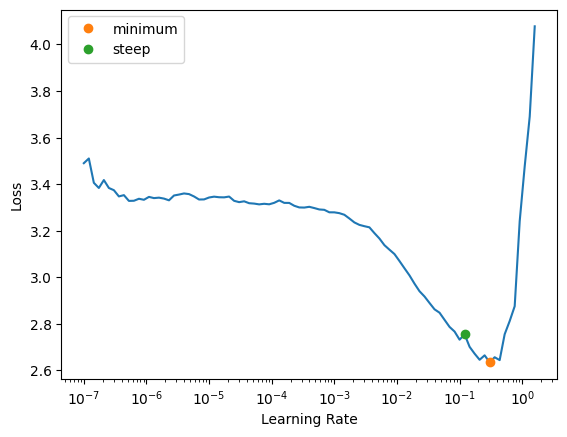

In [7]:
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [8]:
lr_min, lr_steep

(0.03019951581954956, 0.12022644281387329)

- it seems that learning rate 0.03 will be appropriate

In [9]:
learn.fit_one_cycle(8, lr_min)

epoch,train_loss,valid_loss,accuracy,time
0,3.005628,2.405031,0.483660,00:08
1,2.359572,1.690003,0.529412,00:08
2,1.993939,1.157918,0.692810,00:09
3,1.551855,0.638416,0.823529,00:09
4,1.134697,0.431232,0.915033,00:08
5,0.840521,0.285259,0.941176,00:09
6,0.635358,0.279669,0.928105,00:08
7,0.479327,0.275828,0.941176,00:08


# Validate with valid_df
Get predictions and targets

In [13]:
val_preds, val_targets = learn.get_preds()
val_accuracy = accuracy(val_preds, val_targets)
print(f'Validation accuracy: {val_accuracy}')

Validation accuracy: TensorBase(0.9412)


compute classification report

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
classification_report(val_targets, val_preds.argmax(dim=1))

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         4\n           1       1.00      1.00      1.00         9\n           2       1.00      0.80      0.89         5\n           3       1.00      1.00      1.00         2\n           4       1.00      1.00      1.00         3\n           5       0.67      1.00      0.80         2\n           6       1.00      1.00      1.00         6\n           7       0.80      1.00      0.89         4\n           8       1.00      0.90      0.95        10\n           9       1.00      1.00      1.00         3\n          10       1.00      0.67      0.80         9\n          11       1.00      1.00      1.00         3\n          12       1.00      0.43      0.60         7\n          13       1.00      1.00      1.00        10\n          14       1.00      1.00      1.00         6\n          15       0.91      1.00      0.95        10\n          16       0.70      1.00      0.82         7\n       

let's see confusion matrix

In [16]:
confusion_matrix(val_targets, val_preds.argmax(dim=1))

array([[ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  9,  0,  0,  0,  0,  0, 

exporting the model

In [18]:
learn.export('resume_parser_model.pkl')